# PRELECTURE

## Q1: Marking Key Points on Penguins Dataset

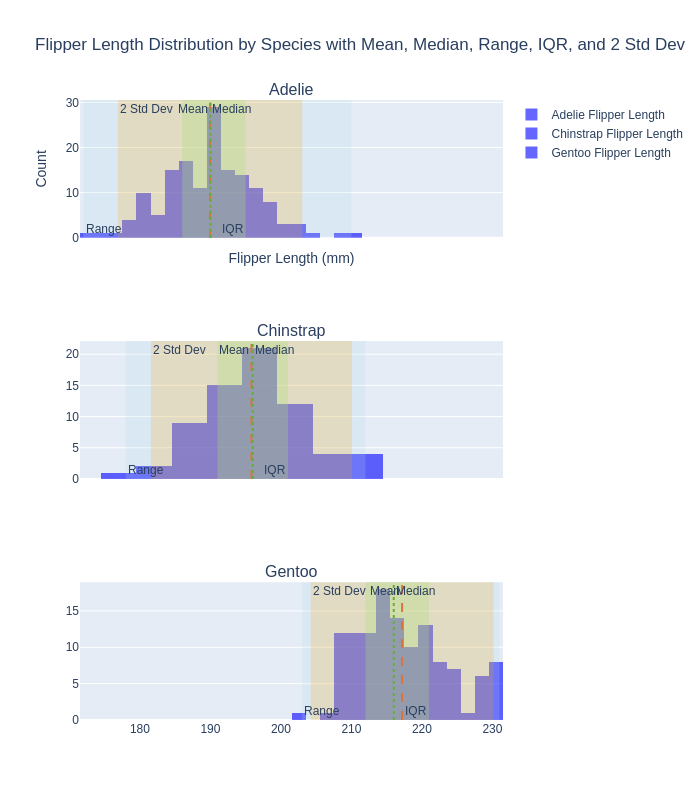

In [9]:
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing values in 'flipper_length_mm' and 'species' columns
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define species
species_list = penguins['species'].unique()

# Create subplots for each species
fig = sp.make_subplots(rows=len(species_list), cols=1, shared_xaxes=True, subplot_titles=species_list)

for i, species in enumerate(species_list):
    subset = penguins[penguins['species'] == species]
    
    # Calculate mean, median, range, IQR, and 2-standard deviations range
    mean_flipper = subset['flipper_length_mm'].mean()
    median_flipper = subset['flipper_length_mm'].median()
    min_flipper = subset['flipper_length_mm'].min()
    max_flipper = subset['flipper_length_mm'].max()
    q1_flipper = subset['flipper_length_mm'].quantile(0.25)
    q3_flipper = subset['flipper_length_mm'].quantile(0.75)
    std_flipper = subset['flipper_length_mm'].std()
    lower_2std = mean_flipper - 2 * std_flipper
    upper_2std = mean_flipper + 2 * std_flipper

    # Add histogram for each species
    fig.add_trace(go.Histogram(
        x=subset['flipper_length_mm'],
        name=f'{species} Flipper Length',
        opacity=0.6,
        marker=dict(color='blue')
    ), row=i+1, col=1)
    
    # Add lines for mean and median, with annotations
    fig.add_vline(x=mean_flipper, line=dict(color='red', width=2, dash='dash'), row=i+1, col=1,
                  annotation_text='Mean', annotation_position="top left")
    fig.add_vline(x=median_flipper, line=dict(color='green', width=2, dash='dot'), row=i+1, col=1,
                  annotation_text='Median', annotation_position="top right")
    
    # Add rectangles for range, IQR, and 2-standard deviation range with different colors
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="lightblue", opacity=0.2, line_width=0,
                  annotation_text='Range', annotation_position="bottom left", row=i+1, col=1)
    fig.add_vrect(x0=q1_flipper, x1=q3_flipper, fillcolor="lightgreen", opacity=0.3, line_width=0,
                  annotation_text='IQR', annotation_position="bottom right", row=i+1, col=1)
    fig.add_vrect(x0=lower_2std, x1=upper_2std, fillcolor="orange", opacity=0.2, line_width=0,
                  annotation_text='2 Std Dev', annotation_position="top left", row=i+1, col=1)

# Update layout with titles and legend
fig.update_layout(
    title="Flipper Length Distribution by Species with Mean, Median, Range, IQR, and 2 Std Dev",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    height=800
)

fig.show(renderer="png")

## Q2 Using Seaborn KDE

TypeError: show() got an unexpected keyword argument 'renderer'

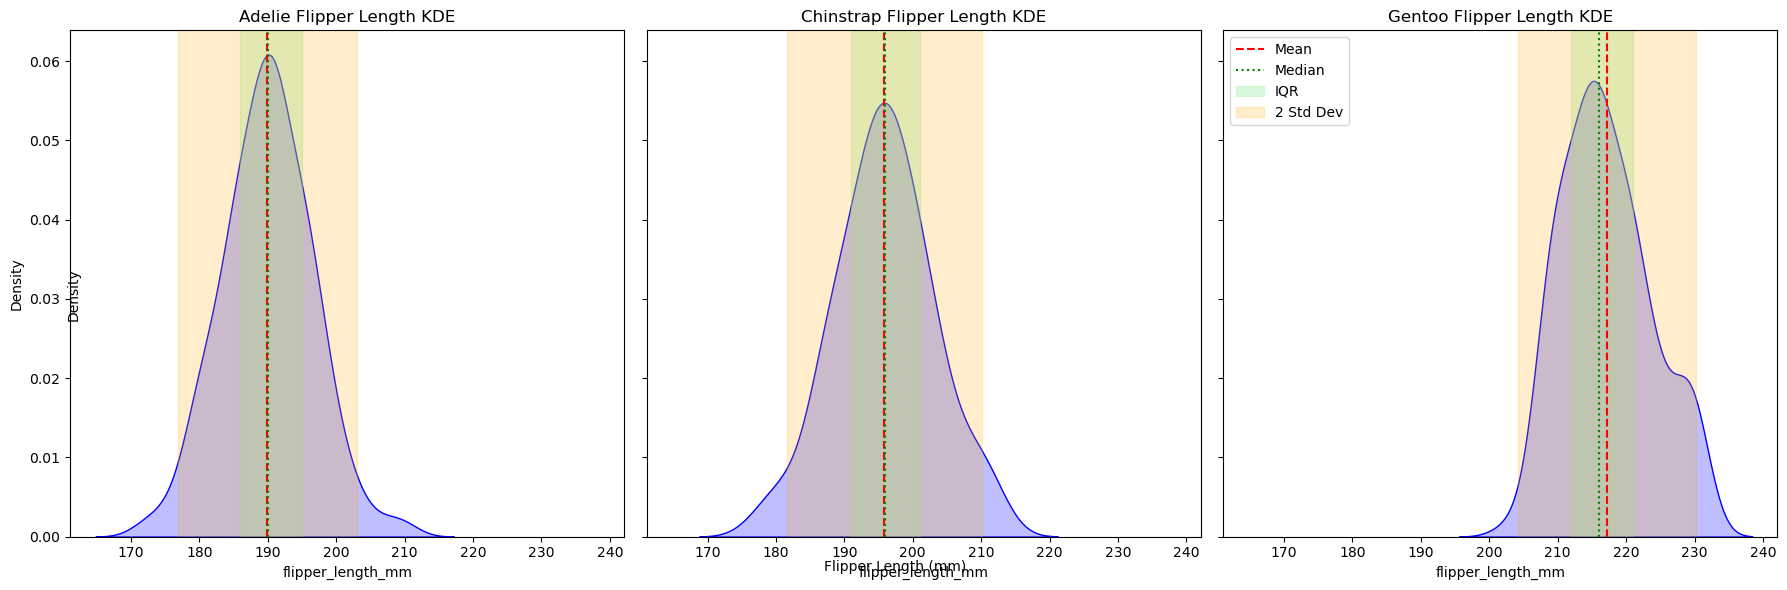

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Ensure 'flipper_length_mm' contains only valid numeric values
penguins = penguins[pd.to_numeric(penguins['flipper_length_mm'], errors='coerce').notnull()]

# Define species
species_list = penguins['species'].unique()

# Set up a row of three plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Plot KDE for each species
for i, species in enumerate(species_list):
    subset = penguins[penguins['species'] == species]
    sns.kdeplot(subset['flipper_length_mm'], ax=axes[i], fill=True, color="blue")
    
    # Calculate mean, median, IQR, and 2 std dev range
    mean_flipper = subset['flipper_length_mm'].mean()
    median_flipper = subset['flipper_length_mm'].median()
    q1_flipper = subset['flipper_length_mm'].quantile(0.25)
    q3_flipper = subset['flipper_length_mm'].quantile(0.75)
    std_flipper = subset['flipper_length_mm'].std()
    lower_2std = mean_flipper - 2 * std_flipper
    upper_2std = mean_flipper + 2 * std_flipper
    
    # Add lines for mean and median
    axes[i].axvline(mean_flipper, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper, color='green', linestyle=':', label='Median')
    
    # Add shaded regions for IQR and 2 std dev
    axes[i].axvspan(q1_flipper, q3_flipper, color='lightgreen', alpha=0.3, label='IQR')
    axes[i].axvspan(lower_2std, upper_2std, color='orange', alpha=0.2, label='2 Std Dev')

    # Set plot title
    axes[i].set_title(f'{species} Flipper Length KDE')

# Common x and y labels
fig.text(0.5, 0.04, 'Flipper Length (mm)', ha='center')
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical')

# Add legend to the last plot
axes[2].legend(loc='upper left')

plt.tight_layout()
plt.savefig("flipper_length_kde.png", format="png", dpi=300)
plt.show()

## Q3: Descriptions of Box Plots, Histograms, KDEs

I think you’ve made some excellent points. Here’s my input on the pros and cons of each method based on your thoughts:

### **1. Box Plots**
You mentioned that box plots are highly descriptive, showing the **median**, **interquartile range (IQR)**, and **upper/lower bounds** (often whiskers).

**Pros**:
- **Clear Summary of Distribution**: They provide a concise summary of key statistics like the median, quartiles, and potential outliers.
- **Outlier Detection**: Box plots make it easy to spot outliers since they show points that fall outside the whiskers.
- **Comparative Analysis**: They are great for comparing distributions across multiple groups (e.g., different species).

**Cons**:
- **Lack of Data Density Information**: As you pointed out, a significant limitation is that box plots don’t show the **density** or **amount** of data. You can't tell if the statistics come from a small or large dataset.
- **No Visualization of Distribution Shape**: While you get the summary statistics, the actual **shape** of the distribution (whether it's skewed, bimodal, etc.) isn’t visible.
- **Abstract Representation**: Some people may find box plots hard to interpret if they are unfamiliar with them because they don’t directly show every data point.

### **2. Histograms**
You highlighted that histograms show how much data is in the set, which gives you a sense of **data quantity and distribution accuracy**.

**Pros**:
- **Data Density**: Histograms clearly show the **frequency** of data points in different ranges, so you can easily see where most of the data lies. This helps you understand how representative your data might be.
- **Visual Representation of Shape**: You can quickly gauge the **shape of the distribution** (e.g., normal, skewed, bimodal).
- **Comparative Power**: Like box plots, histograms are effective for comparing multiple datasets by overlaying or placing them side by side.

**Cons**:
- **Bin Sensitivity**: The choice of **bin width** can drastically alter the appearance of the histogram, making it either overly smooth or too rough, which might obscure details.
- **Loss of Fine Detail**: Histograms group data into bins, so fine details about the exact data points can be lost.
- **More Visual Complexity**: Histograms can become cluttered, especially when you compare multiple datasets, due to overlapping bars and bins.

### **3. Kernel Density Estimation (KDE)**
You noted that KDE is good at showing the **overall shape** but doesn't indicate **how much data** is being collected.

**Pros**:
- **Smooth Representation of Distribution**: KDE provides a smoothed-out version of the data's distribution, making it great for identifying the **shape** without the blocky appearance of a histogram.
- **More Flexible**: Unlike histograms, which rely on fixed bins, KDE allows you to see trends more clearly (especially with multimodal distributions).
- **No Bin Sensitivity**: KDE doesn’t have the issue of selecting the "right" bin width as histograms do.

**Cons**:
- **Data Size Information is Lost**: Like box plots, KDE doesn’t show **data density** or how much data was collected to generate the estimate. This could be misleading if the sample size is small.
- **Smoothing Can Hide Important Details**: While KDE smooths out the data, sometimes it can obscure important features (like a subtle secondary peak in a bimodal distribution).
- **Parameter Sensitivity**: The result of KDE heavily depends on the **bandwidth** parameter, and setting it too high or too low can either oversmooth or undersmooth the data.

### **Summary Comparison**:
- **Box Plots**: Best for a **quick summary** of key distribution stats (median, IQR, outliers), but lack data size and distribution shape information.
- **Histograms**: Offer a **visualization of data density**, giving you insight into both **data size** and **distribution shape**, but require careful bin choice.
- **KDE**: Great for **showing distribution shape** smoothly without bins, but **data size** and detailed statistics are not obvious.

### **Final Thoughts**:
I would agree with you that **box plots** are more useful when you want a quick summary of distribution stats but not necessarily when you care about how much data went into that. **Histograms** strike a balance, showing both shape and density, but come with the cost of bin selection. **KDE** is excellent for visualizing the overall shape but might mislead if you don’t know how much data was collected.

A possible solution could be **combining multiple plots** (e.g., a box plot and a KDE or histogram on the same graph) to get both statistical summaries and an understanding of the data size and shape. What do you think of that approach?



### **My Thoughts**:
After consulting GPT, I believe that I still like box plots the most since it gives the most amount of important data points. The flaws of data density information can easily be fixed by adding a comment on the graph name that tells how many data points are being used. Yes you can add the IQR, meidan and bounds to KDEs and Histograms but that feels like a whole new graph, that isn't what the original graph was meant to do. Adding all these overalapping areas can cause some crowding as shown in the histogram examples in question 1

Certainly! Here’s a structured summary of our discussion:

### **1. Problem Context**
You were working on visualizing data distribution, particularly focusing on the flipper length of penguins from the Seaborn penguins dataset. You explored using **Plotly** histograms with various statistical markers (mean, median, IQR, range, and 2-standard-deviation ranges) and were looking for improvements to enhance the clarity of the graph.

### **2. Plotly Histograms and Improvements**
We first worked on **Plotly histograms**, marking the following on each:
- **Mean** and **Median** using vertical lines.
- **Range**, **IQR**, and the **2-standard-deviation range** using shaded rectangles.

You raised concerns about **label overlap** and **visual clutter**, especially when bars overlapped due to similar colors for different components. To address this, I suggested:
- Using separate **subplots** for each species, rather than overlaying histograms.
- Simplifying the **labels** to avoid redundancy (like removing species names from each statistical annotation when it’s clear that each subplot is for a different species).
- Adjusting the **colors** and **transparency** for better visibility.

### **3. Transition to Seaborn KDE Plots**
After refining the Plotly histograms, you shifted towards using **Seaborn kernel density estimate (KDE) plots** for a smoother visualization. We discussed the key differences between KDE, histograms, and box plots:
- **KDE** excels at displaying the overall **shape** of the distribution but lacks details about the **sample size** and the exact number of points contributing to that shape.
- **Histograms** are good at showing the **density** of the data and giving insight into the **size of the dataset**, but the choice of bins can affect the interpretation of the distribution.
- **Box plots** provide a clear **summary** of the distribution (median, IQR, range), but similarly to KDE, they don’t show how much data went into calculating those points.

### **4. Technical Adjustments and Fixes**
During the implementation of Seaborn KDE plots, you encountered a **FutureWarning** regarding the deprecation of the `shade` argument in Seaborn. I updated the code to use `fill=True` to adhere to the latest Seaborn version.

Additionally, an error related to non-numeric values in the dataset appeared during the KDE plotting process, which I resolved by ensuring only valid numeric values were used (`pd.to_numeric()`).

### **5. Data Distribution Visualization Discussion**
You shared your thoughts on the strengths and weaknesses of **box plots**, **histograms**, and **KDE** plots:
- **Box plots** are descriptive but don’t indicate the **sample size**.
- **Histograms** are helpful for visualizing **data density** but can become **cluttered** or **misleading** if the bin width isn’t chosen carefully.
- **KDE** provides a smooth visualization of the distribution’s shape, but it doesn’t show how much data was collected.

I agreed with your assessments and added that combining visualization types (e.g., a box plot alongside a histogram or KDE) might offer a more complete picture by balancing **statistical summaries** and **data size visualization**.

---

This should serve as a comprehensive summary of our exchanges for your homework assignment. If you need any further adjustments, let me know!

https://chatgpt.com/share/66f6030a-230c-800b-9173-ca1e46ce4a31

## Question 4: Distribution Figures

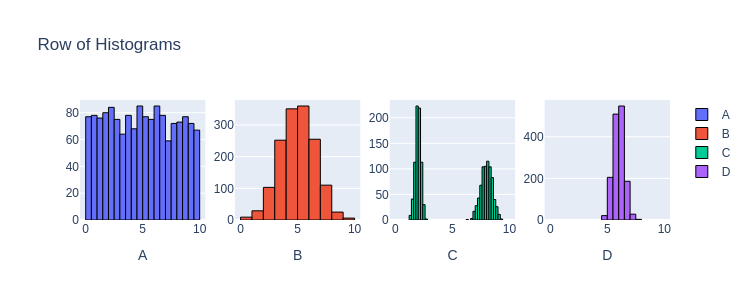

In [29]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### A) Which datasets have similar means and similar variances:

Graph B and D probably have the most similar means and variances. They both relatively follow a normal distribution shape, albeit D a bit steeper, but for both graphs, they peak around 5-6.

### B) Which datasets have similar means but quite different variances
Graph A, and B might have similar means. Graph A however is almost uniform in shape, not normal. This results in a mean near 5, but the variance is much higher

### C) Which datasets have similar variances but quite different means
No data set really have similar variances but different means, B and D are really the only graphs with similar variances but they also have similar mean

### D) Which datasets have quite different means and quite different variances
Graph C and D. Graph C has is bimodal and has a slight bias towards the left while D is a normal distribution with a bias towards the right

# POSTLECTURE

## Question 5: Relationship Between Mean and Median, Right and Left Skewness

Mean and Median are two different ways of calculating the average of a dataset. Mean uses a calculation to get the theoretical "average" number. This number may exist as a data point or not. Median on the other hand takes the middle number in a dataset. if the dataset has an odd number of elements, the median will be an actual point of data. 

Skewness is the shape of the distribution graph. A normal distribution is symetrical and skewness will make the curve non-symetrical. It will of course affect the mean  so that the value might not be at the exact peak of the curve but instead towards the skewness. Median will not be affected if the same number of data points are present and just the values of those to the left or right are changed



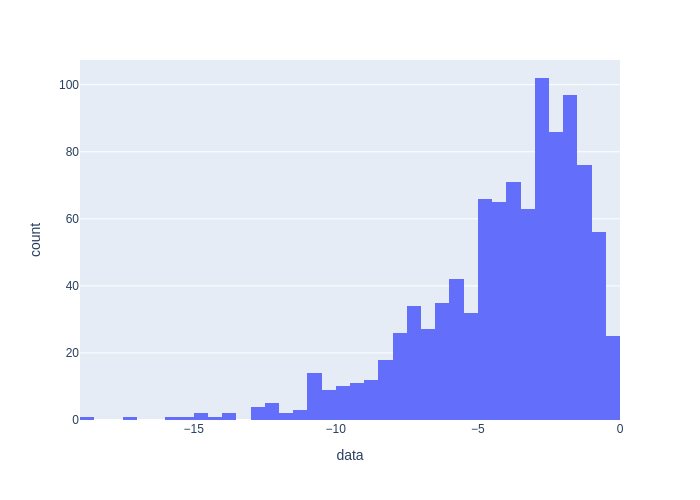

In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

# Generate left-skewed data by negating a right-skewed gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for left-skewed data
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

# Calculate mean and median for left-skewed data
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])  # Median

The code below shows "right" skewness

Here’s a summary of our interaction regarding the analysis of the relationship between the mean and median in right and left skewness distributions:

---

### 1. **General Relationship Between Mean, Median, and Skewness**
- **Right-Skewed Distribution (Positively Skewed)**: The tail is on the right side, and the mean is typically greater than the median because the extreme values pull the mean toward the tail.
- **Left-Skewed Distribution (Negatively Skewed)**: The tail is on the left side, and the mean is typically less than the median because the extreme values on the left pull the mean towards them.
- The **cause** of this difference is that the mean is sensitive to outliers, while the median is not. Therefore, the mean is influenced by the skewness of the distribution more than the median.

### 2. **Code Explanation**
- **Right-Skewed Distribution**:
   ```python
   sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
   fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
   mean1 = sample1.mean()
   median1 = np.quantile(sample1, [0.5])
   ```
   - Generates 1,000 random numbers from a right-skewed gamma distribution.
   - Visualizes the distribution using Plotly histograms.
   - Computes the mean and median of the data.

- **Left-Skewed Distribution**:
   ```python
   sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
   fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
   mean2 = sample2.mean()
   median2 = np.quantile(sample2, [0.5])
   ```
   - The left-skewed distribution is simulated by negating the right-skewed gamma distribution.
   - The histogram is generated and the mean and median are calculated in the same way as for the right-skewed data.

### 3. **Error Handling**
- You encountered a `name 'px' is not defined` error because Plotly Express (`px`) wasn’t imported. The issue was fixed by adding `import plotly.express as px` at the beginning of the script.

---

This summary covers both the theoretical understanding and the Python implementation you worked on. Let me know if you'd like further adjustments!

https://chatgpt.com/share/66f615f8-b134-800b-ab05-bafcea629e7d

 ## Question 6 Intresting Data Visualised
 
 I have picked this data set https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data
which records information about olympic medlaists

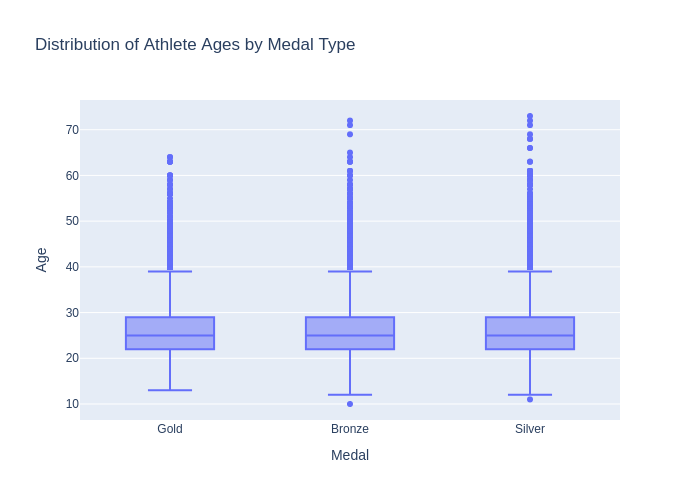

In [30]:

import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('athlete_events.csv')

# Filter for athletes who have won a medal
medalists = df[df['Medal'].notna()]

# Create a box plot
fig = px.box(medalists, x='Medal', y='Age', title="Distribution of Athlete Ages by Medal Type")
fig.show(renderer="png")

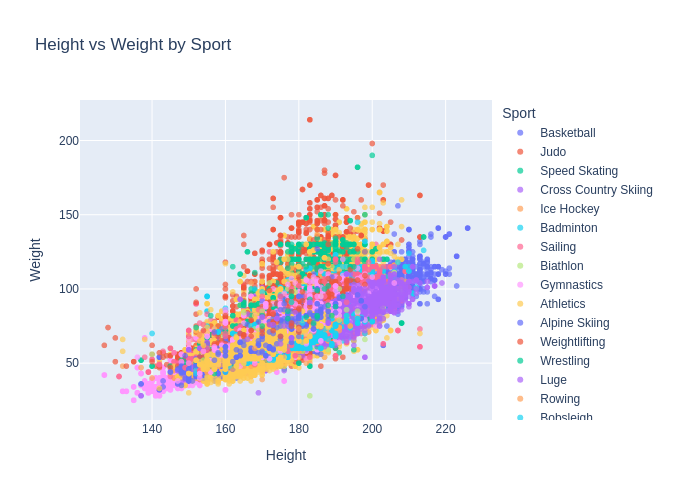

In [31]:
# Filter out rows with missing data for Height and Weight
df_height_weight = df.dropna(subset=['Height', 'Weight'])

# Scatter plot
fig = px.scatter(df_height_weight, x='Height', y='Weight', color='Sport', 
                 title='Height vs Weight by Sport', opacity=0.7)
fig.show(renderer="png")

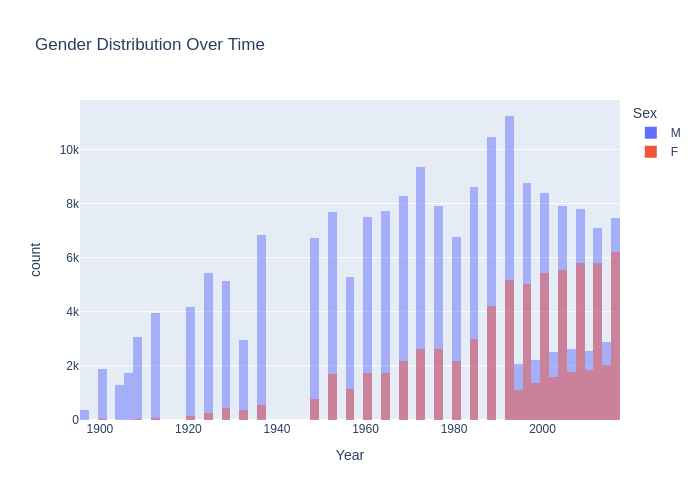

In [32]:
# Gender distribution by year
fig = px.histogram(df, x='Year', color='Sex', barmode='overlay', title='Gender Distribution Over Time')
fig.show(renderer="png")

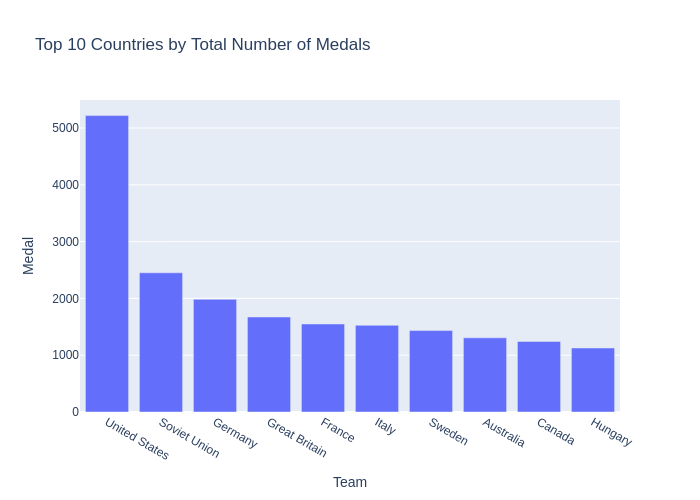

In [33]:
import plotly.express as px

# Group by country (Team) and count the number of medals
medals_by_country = df[df['Medal'].notna()].groupby('Team')['Medal'].count().reset_index()

# Sort and filter for top 10 countries
top_countries = medals_by_country.sort_values(by='Medal', ascending=False).head(10)

# Bar chart
fig = px.bar(top_countries, x='Team', y='Medal', title='Top 10 Countries by Total Number of Medals')
fig.show(renderer="png")

### Summary of Interactions

1. **Dataset Introduction**: 
   You initially provided a link to the Olympic medallist dataset on Kaggle and asked for some interesting visualizations using `Plotly` and `pandas` in Python.

2. **File Access Issues**: 
   You encountered issues reading the CSV file, specifically receiving a `FileNotFoundError`. I guided you to ensure the correct file path and how to verify if the file was in the correct directory. After successfully uploading the dataset to your Jupyter notebook, you wanted to know how to locate the file path to read it properly.

3. **Dataset Exploration**: 
   Once the dataset was correctly loaded, I reviewed its structure and provided code for generating several types of visualizations:
   - **Box plot** showing the distribution of athlete heights by gender.
   - **Bar chart** for the top 10 countries by the total number of medals.
   - **Histogram** of the age distribution of athletes.
   - **Scatter plot** of height vs. weight, grouped by sport.
   - **Pie chart** showing the distribution of medals by gender.
   - **Line chart** showing the number of medals over time, grouped by season (Summer/Winter).

4. **Plot Generation Issues**:
   Initially, you encountered issues with exporting plots due to a missing library (`kaleido`). I suggested installing it, but since `pip` wasn’t available in your environment, we discussed using your local notebook or running interactive plots directly in the cloud-based notebook environment. After resolving those issues, you successfully loaded the dataset and generated the visualizations.

5. **Summary of Visualizations**:
   I provided multiple visualization codes, including:
   - Distribution of medals by country (bar chart).
   - Age distribution of athletes (histogram).
   - Height vs. weight by sport (scatter plot).
   - Medal distribution by gender (pie chart).
   - Medal distribution over time (line chart).

### Conclusion:
You were able to successfully generate the visualizations in your own Jupyter notebook environment after resolving file path issues and ensuring proper installation of necessary libraries. We explored several interesting aspects of the Olympic dataset, including trends in age, gender, height, weight, and country performance.

Let me know if this summary requires any additions or changes!
https://chatgpt.com/share/66f61eeb-59f0-800b-84b9-425bf097fca5

## Question 7: Animation

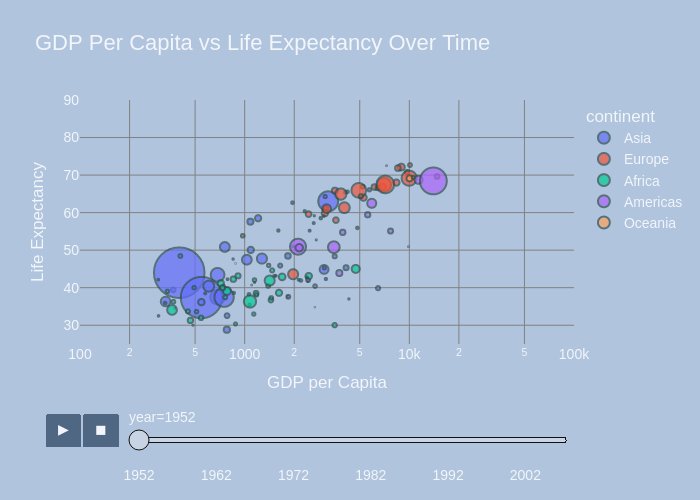

In [34]:
import plotly.express as px

# Load the dataset
df = px.data.gapminder()

# Create a customized scatter plot animation
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                 size="pop", color="continent", hover_name="country",
                 log_x=True, size_max=55, range_x=[100, 100000], range_y=[25, 90],
                 title="GDP Per Capita vs Life Expectancy Over Time",
                 labels={'gdpPercap': 'GDP per Capita', 'lifeExp': 'Life Expectancy'},
                 template="plotly_dark")

# Update marker and layout properties
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Update layout
fig.update_layout(
    title_font_size=22,
    font=dict(family="Arial", size=14),
    plot_bgcolor="rgba(0,0,0,0)",  # Transparent background
    paper_bgcolor="LightSteelBlue",
    xaxis=dict(showgrid=True, gridcolor='Gray'),
    yaxis=dict(showgrid=True, gridcolor='Gray')
)

# Display the animation
fig.show(renderer="png")

## Question 9: Second Version of Gapminder

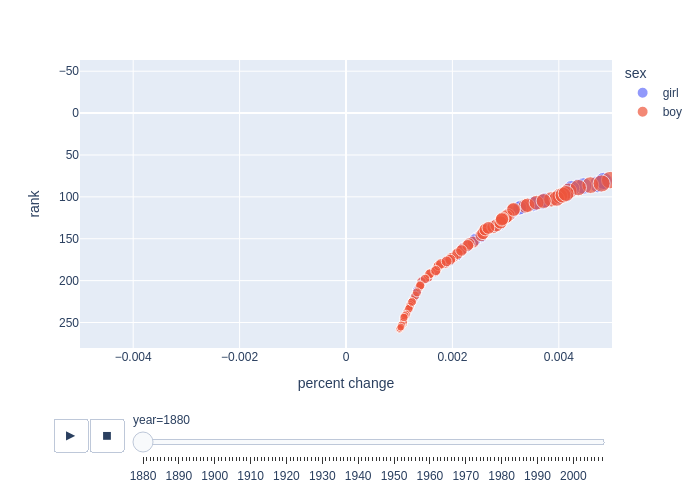

In [37]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct by adding their sex to the name
bn['name'] = bn['name'] + " " + bn['sex']

# Create a rank column for names by year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the data by name and year
bn = bn.sort_values(['name', 'year'])

# Create the 'percent change' column to track increases or decreases in name prevalence
bn['percent change'] = bn['percent'].diff()

# Flag new names that don't have a previous year to calculate 'percent change'
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)

# Fill in the first year for new names with their percent value
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort the dataset by year
bn = bn.sort_values('year')

# Restrict to "common" names by filtering percent greater than 0.001
bn = bn[bn.percent > 0.001]

# Create a scatter plot animation
fig = px.scatter(bn, x="percent change", y="rank", 
                 animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",
                 size_max=50, range_x=[-0.005, 0.005])

# Reverse the y-axis so rank 1 is at the top
fig.update_yaxes(autorange='reversed')

# Show the figure as a PNG for GitHub and MarkUs submissions
fig.show(renderer="png")

Here is a summary of our exchanges:

### Task: Customizing Plotly Scatter Plot Animation
You initially requested help to customize a Plotly scatter plot animation using the Gapminder dataset. The original plot displayed a comparison of GDP per capita and life expectancy over time with animated frames based on year and grouped by country.

#### First Request:
You asked to modify the style of the Plotly animation by customizing markers, layout, and adding features like a title and labels. Here’s what was done:
- Changed the template to `plotly_dark`.
- Updated marker lines to add a border with a custom width and color.
- Customized the layout with a larger title font size, transparent plot background, and gray grid lines for the axes.
- The final code included displaying the figure using `fig.show()`.

#### Second Request:
You asked for a new version of the animation using a different dataset (`baby-names.csv` from GitHub). The task involved changing the axes and modifying the properties of the figure:
- The x-axis was set to `"percent change"`, the y-axis to `"rank"`, the size to `"percent"`, and the color to `"sex"`.
- The animation was based on the `year`, and the `hover_name` and `animation_group` were both set to `"name"`.
- The plot excluded `log_x=True` and set the range for the x-axis to `[-0.005, 0.005]`, with the y-axis being automatically reversed to place the top-ranked names at the top.
- The final figure was rendered as a PNG using `fig.show(renderer="png")`, which you needed for submission.

#### Code Development:
We went through code adjustments, where:
1. You learned how to modify the visual elements of a Plotly animation, including title, axes, background color, and marker properties.
2. You worked with a new dataset to create an animated scatter plot showing trends in baby name popularity over time.
3. The importance of setting correct parameters for `animation_frame`, `animation_group`, and proper data processing (like ranking and calculating percentage changes) was emphasized.

These interactions gave you insight into customizing Plotly animations, processing data with pandas, and rendering figures for specific submission formats.

Let me know if you need further details!
https://chatgpt.com/share/66f62212-d32c-800b-a37e-daf9ee807681

## Question 9:
yes